# Plotting Data in Qiskit

In [15]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
%matplotlib inline

This notebook is intended for learning how to visualize results and quantum data with Qikit

### Histograms

A 2 - qubit bell state is given by :
![Bell state](https://wikimedia.org/api/rest_v1/media/math/render/svg/cc1f9f3d0ac01b1569b750b5b2db0428f433a169)
we can create, simulate and visualize a quantum circuit of this like so:

In [18]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

bell = QuantumCircuit(q,c)
bell.h(q[0]) # Hadamard gate (H-gate)
bell.cx(q[0],q[1]) # cNOT gate (Pauli x)

meas = QuantumCircuit(q,c)
meas.measure(q,c)


qasm_backend = BasicAer.get_backend('qasm_simulator') # simulator
qc = bell + meas

sim_job = execute(qc,qasm_backend,shots = 1_000)
print(sim_job.status())

JobStatus.DONE


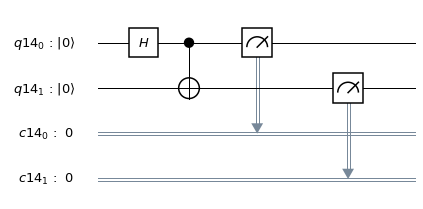

In [20]:
sim_result = sim_job.result() # get the results
qc.draw(output='mpl') # draw the circuit

{'00': 481, '11': 519}


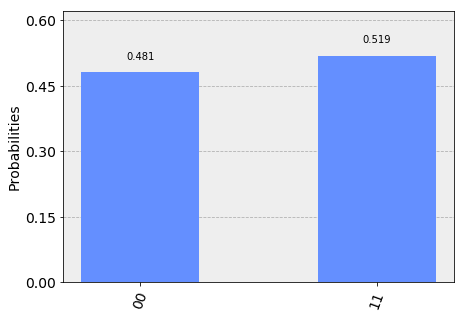

In [24]:
result_count = sim_result.get_counts(qc)
print(result_count) # number of occurances
plot_histogram(result_count) # percentage histogram

### Playing with histograms

In [27]:
# executing again!
sim_job = execute(qc, qasm_backend, shots = 1_000)
print(sim_job.status())

JobStatus.DONE


{'00': 499, '11': 501}


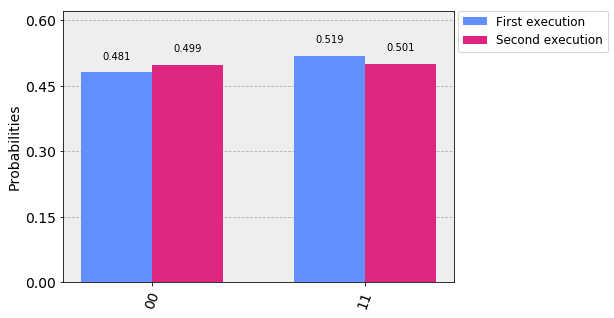

In [31]:
# collecting results again and plotting histogram with both combined
second_sim_result = sim_job.result()
second_sim_count = second_sim_result.get_counts(qc)
print(second_sim_count)
legend = ['First execution', 'Second execution']
plot_histogram([result_count, second_sim_count], legend = legend)

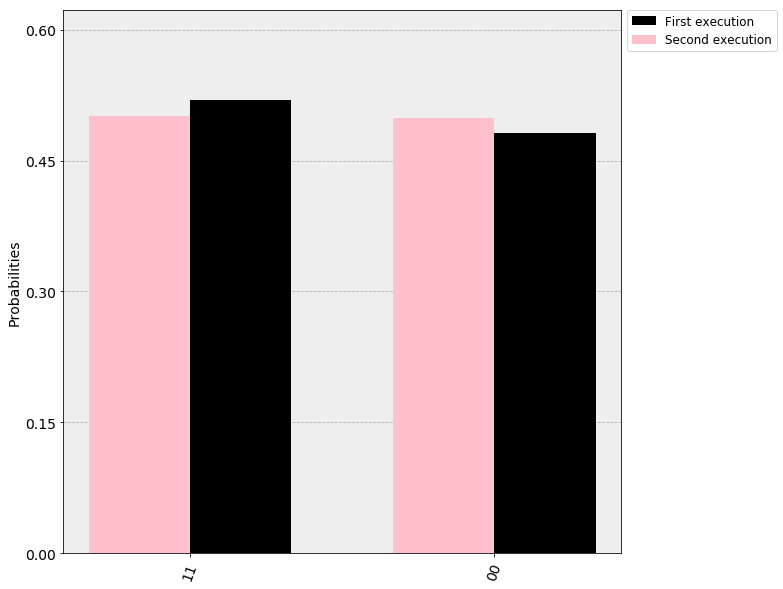

In [33]:
# we can also chnage the color and size of this plot
plot_histogram([result_count, second_sim_count], legend = legend, sort ='desc', figsize = (10,10), color = ['black', 'pink'], bar_labels = False)

In [35]:
# for interactive plotting!
from qiskit.visualization import iplot_histogram
iplot_histogram(result_count)